In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv(r"C:\Users\krish\OneDrive - Southeast Missouri State University\Documents\GitHub\TitanicMLprediction\train.csv")
test = pd.read_csv(r"C:\Users\krish\OneDrive - Southeast Missouri State University\Documents\GitHub\TitanicMLprediction\test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [10]:
import re

names = train['Name']
for index, name in enumerate(names):
    title_search = re.search('(\w+)\.', name)
    if title_search:
        title = title_search.group(1)
        train.loc[index, 'Title'] = title
    else:
        train.loc[index, 'Title'] = None  # or any default value you prefer for rows without a title


In [11]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [12]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [13]:
unique_titles = train['Title'].unique()

In [14]:
data = []

for title in unique_titles:
    title_data = train[train['Title'] == title]
    
    num_survived = title_data[title_data['Survived'] == 1].shape[0]
    total_passengers = title_data.shape[0]
    
    survival_rate = num_survived / total_passengers if total_passengers > 0 else 0
    
    data.append({'Title': title, 'Survival Rate': survival_rate})

SR_df = pd.DataFrame(data)

print(SR_df)


       Title  Survival Rate
0         Mr       0.156673
1        Mrs       0.792000
2       Miss       0.697802
3     Master       0.575000
4        Don       0.000000
5        Rev       0.000000
6         Dr       0.428571
7        Mme       1.000000
8         Ms       1.000000
9      Major       0.500000
10      Lady       1.000000
11       Sir       1.000000
12      Mlle       1.000000
13       Col       0.500000
14      Capt       0.000000
15  Countess       1.000000
16  Jonkheer       0.000000


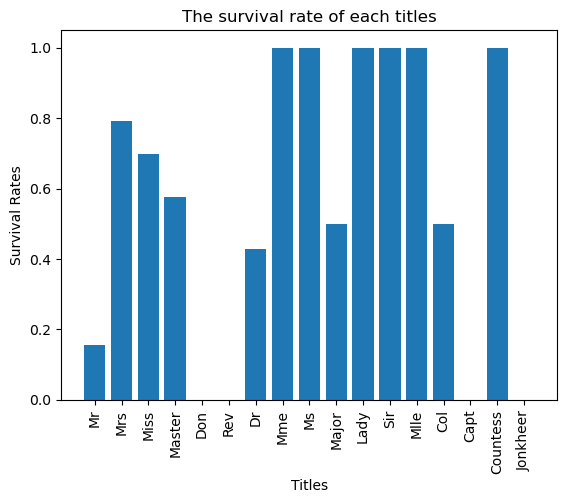

In [15]:
plt.bar(SR_df['Title'],SR_df['Survival Rate'])
plt.xticks(rotation=90)
plt.xlabel('Titles')
plt.ylabel('Survival Rates')
plt.title('The survival rate of each titles')
plt.show()

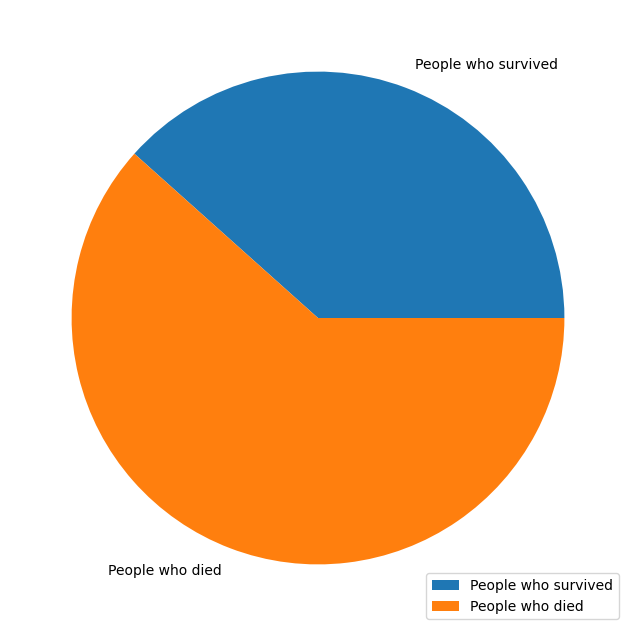

In [16]:
countof1 = sum(1 for i in train['Survived'] if i == 1)
countof0 = sum(1 for i in train['Survived'] if i == 0)
labels = ['People who survived','People who died']
piechart=[countof1,countof0]
plt.figure(figsize=(12, 8))
plt.pie(piechart,labels=labels)
plt.legend(labels, loc='lower right')
plt.show()

## Showing how class or money affected the survival rate of the passengers: 

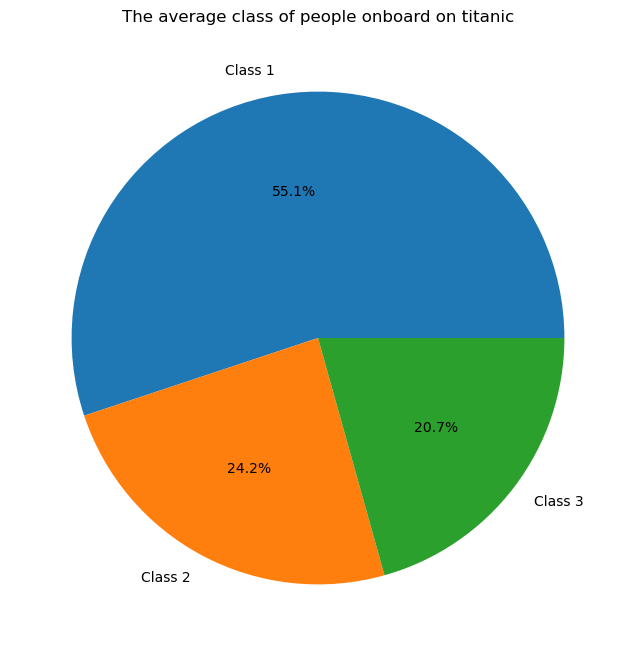

In [35]:
class_counts = train['Pclass'].value_counts()

# Labels for each passenger class
labels = ['Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(12, 8))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%')
plt.title('The average class of people onboard on titanic')
plt.show()

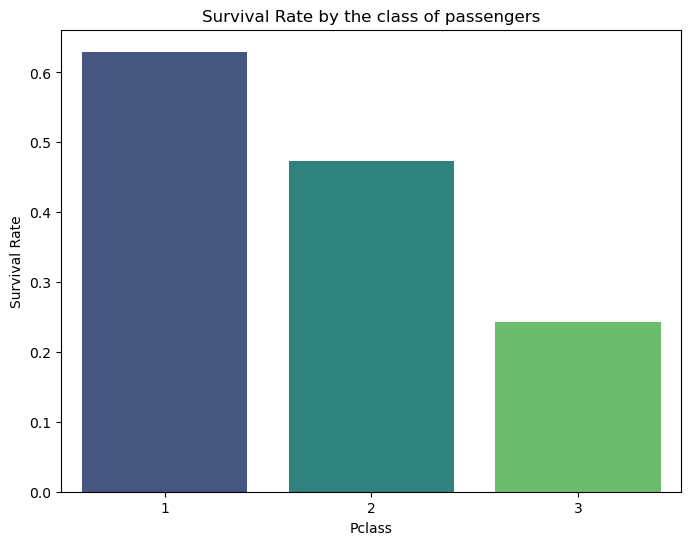

In [34]:
survival_rates = train.groupby('Pclass')['Survived'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=survival_rates, palette='viridis')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by the class of passengers')
plt.show()

AttributeError: PolyCollection.set() got an unexpected keyword argument 'labels'

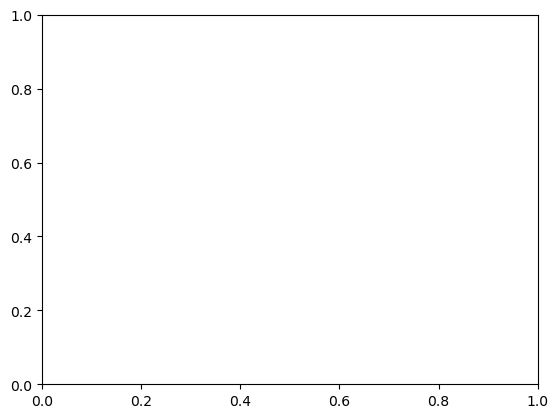

In [43]:
sns.kdeplot(data=train, x='Fare', hue='Survived', fill=True, 
            labels=['Not Survived', 'Survived'])
plt.show()